In [2]:
# 1. Required Libraries

# NumPy: Numerical calculations ke liye use hoti hai (arrays, matrices, etc.)
import numpy as np

# Pandas: Data analysis aur data manipulation ke liye use hoti hai (DataFrames)
import pandas as pd

# Matplotlib: Data visualization ke liye line plots, bar charts banane ke liye use hoti hai
import matplotlib.pyplot as plt

# Seaborn: Advanced visualization ke liye use hoti hai, matplotlib ke upar built hai (e.g., heatmaps, pairplots)
import seaborn as sns

# Scikit-learn se train_test_split: Dataset ko training aur testing part mein divide karne ke liye
from sklearn.model_selection import train_test_split

# StandardScaler: Features ko scale/normalize karne ke liye (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

# Accuracy Score aur Confusion Matrix: Model ki performance evaluate karne ke liye
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression: Ek supervised machine learning model, jo classification problems solve karta hai
from sklearn.linear_model import LogisticRegression


In [3]:
# 2. Load the Heart Disease Dataset
df = pd.read_csv("heart_disease_uci(1).csv")  # CSV file ko DataFrame mein read karna

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# 3. Data Cleaning 🧹
# Null values check karo
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
# Duplicate rows ko remove karo
df.drop_duplicates(inplace=True)

In [7]:
df


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
# Data types check karo
print("\nData Types:\n", df.dtypes)


Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [9]:


# Option set karo to handle future behavior
pd.set_option('future.no_silent_downcasting', True)

# Columns for imputation
mean_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
mode_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

# Mean Imputation for numeric columns
for col in mean_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Mode Imputation for categorical/object columns
for col in mode_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Optional: convert object columns to best possible types
df = df.infer_objects(copy=False)

# Check missing values
print(df.isnull().sum())



id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [10]:
# 4. Data Integration 🔗
# Is example mein sirf ek file use ho rahi hai, to integration ka matlab ho sakta hai:
# - kisi external source se feature add karna
# - yaha pe dummy column jod ke dikhate hain (for demo only)
df["hospital_id"] = np.random.randint(100, 105, size=len(df))  # random hospital ID assign kar rahe hain


In [11]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,hospital_id
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0,101
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2,104
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1,101
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0,100
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1,102
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0,101
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2,104
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0,101


In [12]:
# Selecting required columns from original DataFrame
df1 = df[['age', 'cp', 'chol', 'thalch']]
df2 = df[['exang', 'slope', 'num']]

# Integrating data using column-wise concatenation
merged_df = pd.concat([df1, df2], axis=1)

# Showing result
print("Shape of Merged DataFrame:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())


Shape of Merged DataFrame: (920, 7)
Columns: ['age', 'cp', 'chol', 'thalch', 'exang', 'slope', 'num']


In [13]:
# ============================
# FUNCTION: Mark Outliers using IQR Method
# ============================
def mark_outliers(column):
    # Check if the column is numeric (integer, unsigned, float, complex)
    if column.dtype.kind in 'iufc':
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5 * IQR

        # Boolean mask for outliers
        outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)

        # Return only outliers; non-outliers become NaN
        return column.where(outlier_mask)
    else:
        # Non-numeric columns: return as is
        return column

# ============================
# Columns to check for outliers
# ============================
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# ============================
# Create new columns with outliers marked
# ============================
for col in numeric_columns:
    if col in df.columns:
        df[f'{col}_outliers'] = mark_outliers(df[col])

# ============================
# Extract rows where any outlier exists
# ============================
# Subset DataFrame to only outlier columns
outlier_columns = [f'{col}_outliers' for col in numeric_columns]

# Keep only rows where at least one outlier is present
outliers_df = df[outlier_columns].dropna(how='all')

# ============================
# Display rows containing any outliers
# ============================
print("Rows with outliers:")
print(outliers_df)


Rows with outliers:
     age_outliers  trestbps_outliers  chol_outliers  thalch_outliers  \
0             NaN                NaN            NaN              NaN   
1             NaN                NaN            NaN              NaN   
2             NaN                NaN            NaN              NaN   
3             NaN                NaN            NaN              NaN   
4             NaN                NaN            NaN              NaN   
..            ...                ...            ...              ...   
841           NaN                NaN            NaN              NaN   
854           NaN              172.0            NaN              NaN   
863           NaN                NaN            NaN              NaN   
889           NaN              180.0            NaN              NaN   
896           NaN              190.0            NaN              NaN   

     oldpeak_outliers  ca_outliers  
0                 NaN          0.0  
1                 NaN          3.0  
2   

In [19]:
# ============================
# FUNCTION: Remove Outliers using IQR Method
# ============================
def remove_outliers(df, column):
    # Check if the column is numeric (integer, unsigned, float, complex)
    if df[column].dtype.kind in 'iufc':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the dataframe
        df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        return df_clean
    else:
        # Non-numeric columns: return as is
        return df

# ============================
# Apply to columns in the dataframe to remove outliers
# ============================
df_clean = df  # Copy original dataframe for cleaning

# Remove outliers from each numeric column
for col in numeric_columns:
    if col in df.columns:
        df_clean = remove_outliers(df_clean, col)

# ============================
# Display cleaned dataframe (after removing outliers)
# ============================
print("Cleaned dataframe without outliers:")
print(df_clean)

Cleaned dataframe without outliers:
      id  age     sex        dataset               cp    trestbps   chol  \
166  167   52    Male      Cleveland      non-anginal  138.000000  223.0   
192  193   43    Male      Cleveland     asymptomatic  132.000000  247.0   
287  288   58    Male      Cleveland  atypical angina  125.000000  220.0   
302  303   38    Male      Cleveland      non-anginal  138.000000  175.0   
303  304   28    Male      Cleveland  atypical angina  130.000000  132.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch  ...      

In [14]:
col_name = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']



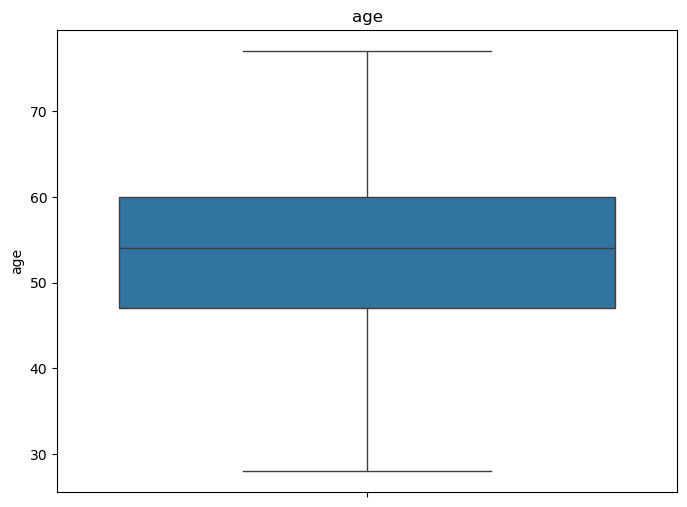

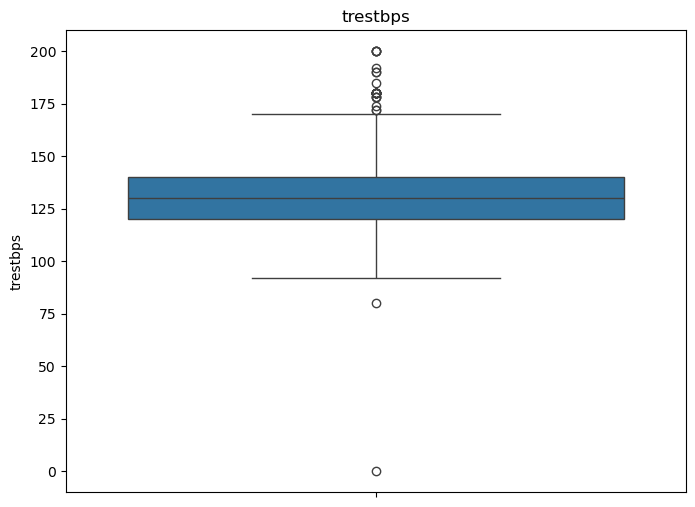

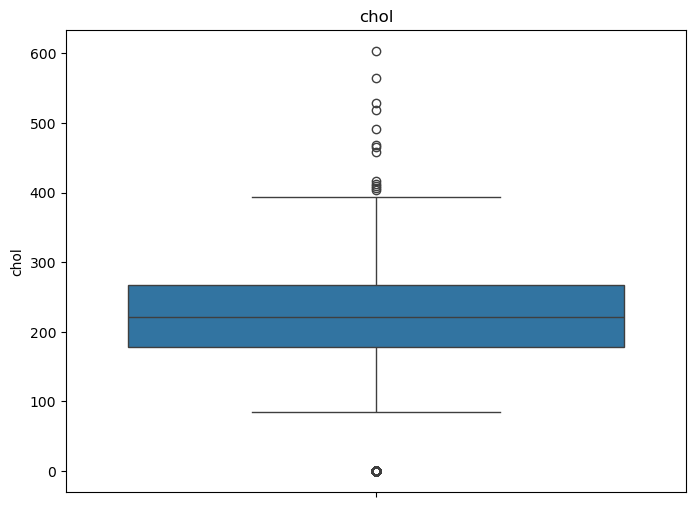

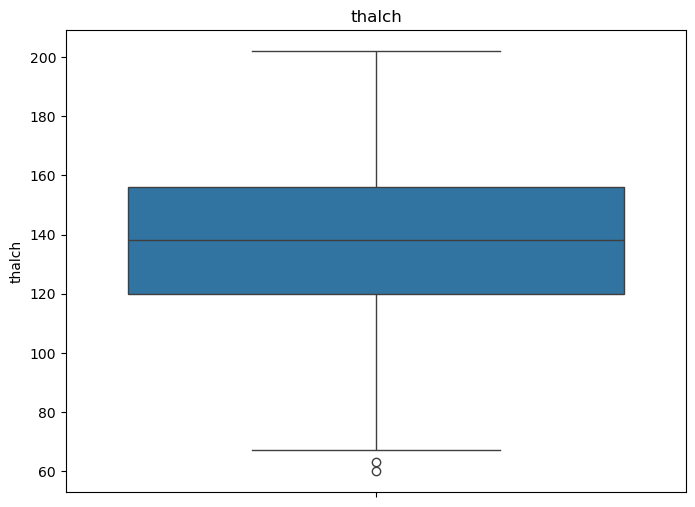

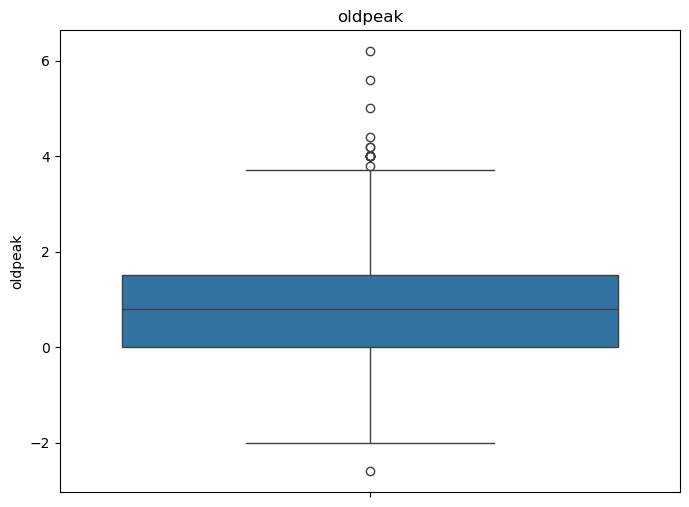

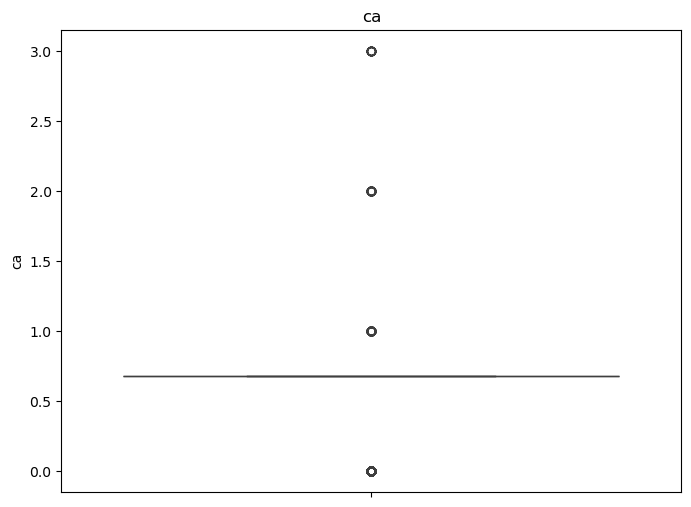

In [15]:
# Har column ke liye alag boxplot banane ke liye loop chala rahe hain
for col in col_name:
    plt.figure(figsize=(8, 6))  # Plot ka size set kar rahe hain (width=8, height=6)
    sns.boxplot(data=df[col])  # Column ke liye boxplot bana rahe hain (outliers dikhane ke liye helpful)
    plt.title(col)  # Plot ka title set kar rahe hain (column ka naam)
    plt.show()  # Plot ko screen par display kar rahe hain


Correlation with the Target:
id                   0.273552
age                  0.339596
trestbps             0.116225
chol                -0.228238
thalch              -0.351055
oldpeak              0.421907
ca                   0.321404
hospital_id         -0.074510
age_outliers              NaN
trestbps_outliers   -0.053648
chol_outliers       -0.192885
thalch_outliers      1.000000
oldpeak_outliers     0.286228
ca_outliers          0.516216
Name: num, dtype: float64



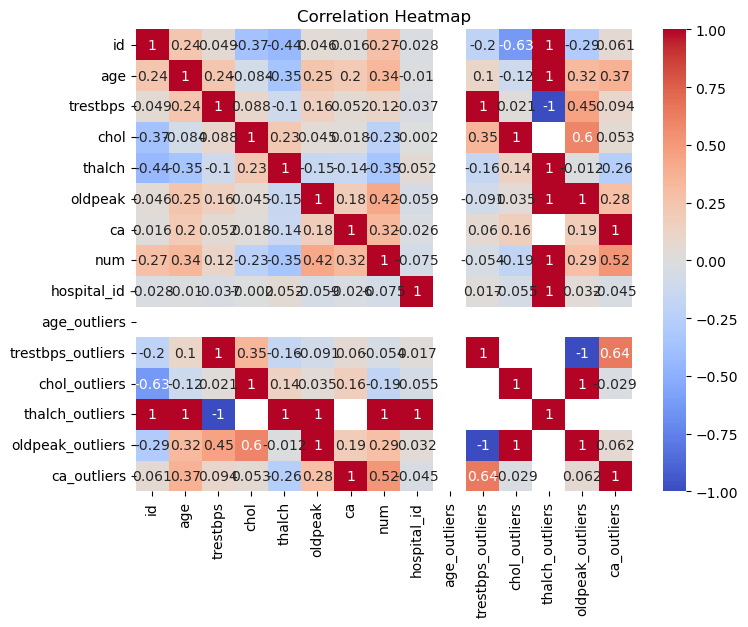

In [16]:
# Import LabelEncoder to convert categorical text data into numbers
from sklearn.preprocessing import LabelEncoder  

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=np.number)  

# Calculate correlation of each column with 'num' and remove 'num' itself from result
correlations = numeric_df.corr()['num'].drop('num')  

# Print correlation values with the target column
print("Correlation with the Target:")  
print(correlations)  
print()  # Just for space in output

# Plot heatmap of all numeric columns' correlation
plt.figure(figsize=(8, 6))  # Set size of the plot
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')  # Create heatmap with values and color scheme
plt.title('Correlation Heatmap')  # Add title
plt.show()  # Display the plot


In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Label encoding aur standardization ke liye tools import

# Step 1: Copy original DataFrame
df1 = df.copy()  # Original df ka copy banaya gaya, taaki original data change na ho

# Step 2: Initialize encoders
label_encoder = LabelEncoder()  # LabelEncoder: strings ko numeric codes mein convert karta hai
scaler = StandardScaler()       # StandardScaler: numeric data ko standard form mein convert karta hai (mean=0, std=1)

# Step 3: Define columns
categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  # Jo columns label encoding ke liye hain
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']    # Jo columns numeric scaling ke liye hain

# Step 4: Encode categorical columns
for col in categorical_cols:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col].astype(str))  # Column ko string mein convert karke encode kiya (NaN avoid karne ke liye)

# Step 5: Handle missing values in numeric columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())  # Missing values ko us column ke mean se replace kiya

# Step 6: Scale numeric columns
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])  # Sab numeric columns ko standard scale pe convert kiya

# Step 7: Final Output
print("✅ Processed DataFrame:")
print(df1.head())  # Final transformed DataFrame ka first 5 rows print kiya


✅ Processed DataFrame:
   id       age  sex  dataset  cp  trestbps      chol    fbs  restecg  \
0   1  1.007386    1        0   3  0.698041  0.311021   True        0   
1   2  1.432034    1        0   0  1.511761  0.797713  False        0   
2   3  1.432034    1        0   0 -0.658158  0.274289  False        0   
3   4 -1.752828    1        0   2 -0.115679  0.467130  False        1   
4   5 -1.328180    0        0   1 -0.115679  0.044717  False        0   

     thalch  ...        ca  thal  num  hospital_id  age_outliers  \
0  0.495698  ... -1.249371     0    0          101           NaN   
1 -1.175955  ...  4.292099     1    2          104           NaN   
2 -0.340128  ...  2.444942     2    1          101           NaN   
3  1.968345  ... -1.249371     1    0          100           NaN   
4  1.371326  ... -1.249371     1    0          100           NaN   

   trestbps_outliers  chol_outliers  thalch_outliers  oldpeak_outliers  \
0                NaN            NaN              NaN   

In [23]:
# Step 1: Categorical values ke andar jo spaces ya inconsistent names hain, unko theek kar rahe hain
df['thalch'].replace({
    'fixeddefect': 'fixed_defect',
    'reversabledefect': 'reversable_defect'
}, inplace=True)  # Thalch column ke labels ko consistent bana rahe hain

df['cp'].replace({
    'typicalangina': 'typical_angina',
    'atypicalangina': 'atypical_angina'
}, inplace=True)  # Chest pain types ko proper naam de rahe hain

df['restecg'].replace({
    'normal': 'normal',
    'st-t abnormality': 'ST-T_wave_abnormality',
    'lv hypertrophy': 'left_ventricular_hypertrophy'
}, inplace=True)  # RestECG ke labels ko readable aur code-friendly bana rahe hain

# Step 2: Zaroori columns ke saath ek naya dataset bana rahe hain
data_1 = df[['age', 'sex', 'cp', 'dataset', 'trestbps', 'chol', 'fbs',
             'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

# Step 3: Target variable ko binary bana rahe hain - 0 = No disease, 1 = Disease
data_1['target'] = (df['num'] > 0).astype(int)

# Step 4: Sex column ko binary encode kar rahe hain - 1 = Male, 0 = Female
data_1['sex'] = (df['sex'] == 'Male').astype(int)

# Step 5: fbs (fasting blood sugar) aur exang (exercise induced angina) ko integer me convert kar rahe hain
data_1['fbs'] = df['fbs'].astype(int)
data_1['exang'] = df['exang'].astype(int)

# Step 6: Columns ke naam meaningful aur readable bana rahe hain
data_1.columns = [
    'age', 'sex', 'chest_pain_type', 'country', 'resting_blood_pressure',
    'cholesterol', 'fasting_blood_sugar', 'restecg',
    'max_heart_rate_achieved', 'exercise_induced_angina',
    'st_depression', 'st_slope_type', 'num_major_vessels',
    'thalassemia_type', 'target'
]

# Step 7: Final dataset ka sample dekh rahe hain
data_1.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\5231915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thalch'].replace({
C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\5231915.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,Cleveland,145.0,233.0,1,left_ventricular_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,Cleveland,160.0,286.0,0,left_ventricular_hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,Cleveland,120.0,229.0,0,left_ventricular_hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,Cleveland,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,Cleveland,130.0,204.0,0,left_ventricular_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [24]:
# 🔧 NOTE: Hum directly original dataset `df` par kaam kar rahe hain
# Iska matlab koi naya copy (jaise `data_1`) nahi banayi — yeh final data cleaning steps hain

# 1️⃣ Categorical values me jo space wale ya inconsistent names hain, unko replace kar rahe hain
# Yeh karna zaroori hai taki future me encoding aur modeling ke time koi issue na ho

df['thal'].replace({
    'fixed defect': 'fixed_defect',
    'reversable defect': 'reversable_defect'
}, inplace=True)

df['cp'].replace({
    'typical angina': 'typical_angina',
    'atypical angina': 'atypical_angina'
}, inplace=True)

df['restecg'].replace({
    'normal': 'normal',
    'st-t abnormality': 'ST-T_wave_abnormality',
    'lv hypertrophy': 'left_ventricular_hypertrophy'
}, inplace=True)

# 2️⃣ Target variable ko binary me convert kar rahe hain
# 'num' column me multiple classes ho sakti hain (0,1,2,3...) — hume sirf binary chahiye:
# 0 = No disease, 1 = Disease present

df['target'] = (df['num'] > 0).astype(int)

# 3️⃣ Categorical values ko encode kar rahe hain jise model samajh sake
# 'sex' me Male = 1, Female = 0
df['sex'] = (df['sex'] == 'Male').astype(int)

# fbs (fasting blood sugar) aur exang (exercise-induced angina) already 0/1 me hote hain
# Fir bhi ensure kar rahe hain ki unka data type integer ho
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# 4️⃣ Columns ke naam meaningful aur readable bana rahe hain
# Taki aage analysis me ya model banate waqt easy ho samajhna

df.rename(columns={
    'cp': 'chest_pain_type',
    'dataset': 'country',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'Restecg',
    'thalch': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope_type',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia_type'
}, inplace=True)

# 5️⃣ Final cleaned data ka sample dekh lete hain
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\1143604138.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].replace({
C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\1143604138.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

,id,age,sex,country,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,...,thalassemia_type,num,hospital_id,age_outliers,trestbps_outliers,chol_outliers,thalch_outliers,oldpeak_outliers,ca_outliers,target
0,1,63,1,Cleveland,typical_angina,145.0,233.0,1,left_ventricular_hypertrophy,150.0,...,fixed_defect,0,101,NaN,NaN,NaN,NaN,NaN,0.0,0
1,2,67,1,Cleveland,asymptomatic,160.0,286.0,0,left_ventricular_hypertrophy,108.0,...,normal,2,104,NaN,NaN,NaN,NaN,NaN,3.0,1
2,3,67,1,Cleveland,asymptomatic,120.0,229.0,0,left_ventricular_hypertrophy,129.0,...,reversable_defect,1,101,NaN,NaN,NaN,NaN,NaN,2.0,1
3,4,37,1,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,...,normal,0,100,NaN,NaN,NaN,NaN,NaN,0.0,0
4,5,41,0,Cleveland,atypical_angina,130.0,204.0,0,left_ventricular_hypertrophy,172.0,...,normal,0,100,NaN,NaN,NaN,NaN,NaN,0.0,0


In [25]:
# 📦 1. Importing Required Libraries
# Ye sab sklearn se aate hain - model building, preprocessing aur evaluation ke liye

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 👇 Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 📊 Evaluation metrics to check model performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


In [26]:
# 🧮 2. Splitting Features (X) and Target (y)
# X = input features (sare columns except 'target')
# y = output variable (target column which we want to predict)

X = df.drop('target', axis=1)
y = df['target']


In [27]:
# 🧠 3. Label Encoding for Categorical Columns
# ML models numerical input samajhte hain. Isliye 'object' ya 'category' type columns ko numbers me convert kar rahe hain.

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = label_encoder.fit_transform(X[col])


In [28]:
# 🩺 4. Handle Missing Values using SimpleImputer
# Agar kisi column me NaN/missing values hain, to unhe fill kar rahe hain mean value se

imputer = SimpleImputer(strategy='mean')  # Tum 'median' ya 'most_frequent' bhi use kar sakte ho
X = imputer.fit_transform(X)  # Ye X ko NumPy array me convert kar deta hai


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['age_outliers']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [29]:
# 🧪 5. Split the Data into Train and Test Sets
# Model ko train karne ke liye 80% data, aur test karne ke liye 20% rakhte hain

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
# 🤖 6. Define Classification Models
# Hum 4 alag-alag ML models try kar rahe hain - har model alag tarike se kaam karta hai

models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True)),  # probability=True ROC ke liye zaroori hai
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier())
]


In [31]:
# 📈 7. Train and Evaluate Each Model
# Har model ko train karenge, test data pe predict karenge, aur performance metrics calculate karenge

model_scores = []  # Sab models ke results store karne ke liye

for name, model in models:
    # 🔧 Model ko training data pe fit karte hain
    model.fit(X_train, y_train)

    # 🧪 Test data pe prediction karte hain
    y_pred = model.predict(X_test)

    # 🧠 ROC AUC ke liye probability chahiye hoti hai (0-1 confidence)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # 📊 Evaluation metrics nikal rahe hain:
    accuracy = accuracy_score(y_test, y_pred)  # Sahi predictions ka percentage
    f1 = f1_score(y_test, y_pred, average='weighted')  # Accuracy + recall ka balance
    precision = precision_score(y_test, y_pred, average='weighted')  # Positive predict karne ki accuracy
    recall = recall_score(y_test, y_pred, average='weighted')  # Kitne actual positives sahi predict hue
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None  # Confidence based metric

    # ✅ Results ko list me store kar rahe hain
    model_scores.append((name, accuracy, f1, precision, recall, roc_auc))

    # 📋 Print kar rahe hain har model ka result
    print(f"📌 {name}")
    print(f"✅ Accuracy: {accuracy:.2f}")
    print(f"🎯 F1 Score: {f1:.2f}")
    print(f"🔍 Precision: {precision:.2f}")
    print(f"📈 Recall: {recall:.2f}")
    if roc_auc is not None:
        print(f"💓 ROC AUC: {roc_auc:.2f}")
    print("-" * 50)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 LogisticRegression
✅ Accuracy: 0.96
🎯 F1 Score: 0.96
🔍 Precision: 0.96
📈 Recall: 0.96
💓 ROC AUC: 0.99
--------------------------------------------------
📌 SVM
✅ Accuracy: 0.75
🎯 F1 Score: 0.75
🔍 Precision: 0.79
📈 Recall: 0.75
💓 ROC AUC: 0.79
--------------------------------------------------
📌 DecisionTreeClassifier
✅ Accuracy: 1.00
🎯 F1 Score: 1.00
🔍 Precision: 1.00
📈 Recall: 1.00
💓 ROC AUC: 1.00
--------------------------------------------------
📌 KNeighborsClassifier
✅ Accuracy: 0.81
🎯 F1 Score: 0.81
🔍 Precision: 0.82
📈 Recall: 0.81
💓 ROC AUC: 0.91
--------------------------------------------------
